In [16]:
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [17]:
file = Path("/home/tako/programming/pp/build/bin/tmp.txt")

params = {
"tau": 0,
"h": 0,
"T": 0,
"X": 0,
"M": 0,
"K": 0
}
vals = []

with open(file) as f:
  for line in f:
    line = line.split()
    name = line[0]
    if name[:-1] in params.keys():
      params[name[:-1]] = float(line[1])
    else:
      vals.append(float(name))

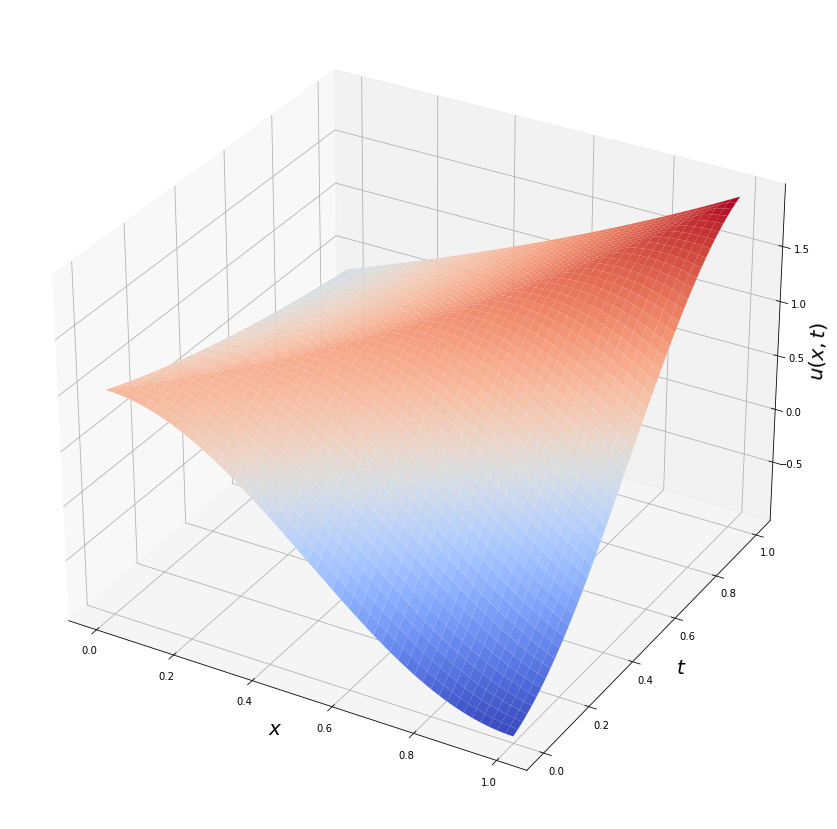

In [18]:
U = np.zeros((int(params['K']), int(params['M'])))
for i in range(U.shape[0]):
  for j in range(U.shape[1]):
    U[i][j] = vals[i * U.shape[1] + j]

X = np.array([k * params['h'] for k in range(U.shape[1])])
T = np.array([k * params['tau'] for k in range(U.shape[0])])

X, T = np.meshgrid(X, T)
fg = plt.figure(figsize=(22, 15))
ax = fg.add_subplot(111, projection="3d")
ax.plot_surface(X, T, U, cmap='coolwarm')
ax.set_xlabel("$x$", fontsize=20)
ax.set_ylabel("$t$", fontsize=20)
ax.set_zlabel("$u(x, t)$", fontsize=20)
plt.show()

In [19]:
u_an = np.zeros((U.shape[0], U.shape[1]))
for i in range(U.shape[0]):
  for j in range(U.shape[1]):
    t = i * params['tau']
    x = j * params['h']
    if 2 * t > x:
      u_an[i][j] = x * t  - t ** 2 / 2 + (2 * t - x) ** 2 / 8 + np.exp(-(t - x / 2))
    else:
      u_an[i][j] = x * t  - t ** 2 / 2 + np.cos(np.pi * (2 * t - x))

np.mean(np.abs(U - u_an))

0.2701860850427242

In [20]:
np.max(U)

1.998